**TRANSFORMACIÓN DE SEÑALES EN TIEMPO CONTINUO**

# **1. En amplitud**
A una señal se le puede cambiar sus valor de amplitud, esto se logra multiplicando la señal por un escalar (real).

Por ejemplo: a·x(t) con a ∈ 𝕽.
*   Si la magnitud del escalar es igual a uno (|a|=1) la señal NO cambiaría su amplitud.
*   Si la magnitud del escalar es mayor a uno (|a|>1) la señal se amplificará.
*   Si la magnitud del escalar es menor a uno (|a|<1) la señal se atenuara.
*   Si el escalar es negativo (a<0), la amplitud cambia se signo.

*Observación: En el código que se mostrará a continuación se utiliza una señal triángulo con amplitud inicial de 3 y un factor de amplitud igual a -2. Usted puede cambiar dicho factor para notar el cambio.*

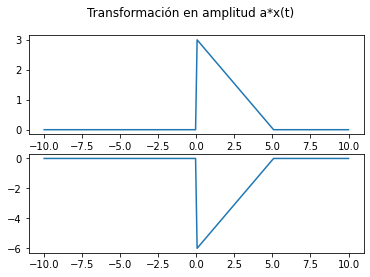

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import square, unit_impulse

def triangulo(t, s, amplitud):

  t1 = s[0]
  t1 = round(t1,0)
  t2 = s[len(s) - 1]
  t2 = round(t2,0)

  x_temp = np.array([])
  temp = 0.0
  pendiente = amplitud / (t2 - t1)
  for i in range(0, points):
    y = -(pendiente * temp) + amplitud 
    x_temp = np.append(x_temp, y)
    temp += 0.1
    temp = round(temp, 1)

  #Desplazar el rango en t1
  s = s + t1

  x = np.array([])
  index = 0

  for value in t:
    value = round(value,1)
    if value in np.around(s, 1):
      x = np.append(x, x_temp[index])
      index += 1
    else:
      x = np.append(x, 0.0)

  return x

t1, t2 = (-10,10)
points = (t2 - t1) * 10
t = np.linspace(t1, t2, points)
t1, t2 = (0,5) #Soporte inicial del triángulo.
s = np.linspace(t1, t2, points, endpoint=False)

amplitud = 3
fx = lambda t, s: triangulo(t, s, amplitud) 
x = fx(t, s) #Triángulo de ampitud 3.
a = -2 #Factor de amplitud
x2 = a*x #Señal escalada.

fig, axs = plt.subplots(2)
fig.suptitle('Transformación en amplitud a*x(t)')
axs[0].plot(t, x)
axs[1].plot(t, x2)



A una señal también se le puede cambiar su valor de desplazamiento vertical (offset), esto se logra sumando un valor constante (DC) a la señal.
Por ejemplo: x(t) + a con a ∈ 𝕽.



*   Si el valor de a es mayor a cero (a > 0) la señal tendrá un desplazamiento hacia arriba.
*   Si el valor de a es menor a cero (a < 0) la señal tendrá un desplazamiento hacia abajo.
*   Si el valor de a es igual a cero (a = 0) la señal NO 
     tendrá ningún cambio.

Observación: Para el código ejemplo se utilizará un offset de 2, usted puede cambiarlo para observar el cambio de la señal dependiendo de este valor.





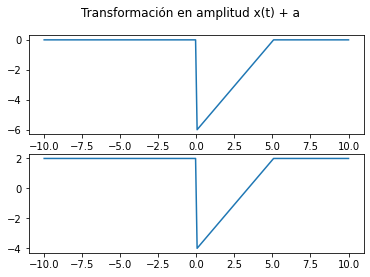

In [ ]:
Offset = 2 #Offset
x3 = x2 + Offset #Señal escalada.

fig, axs = plt.subplots(2)
fig.suptitle('Transformación en amplitud x(t) + a')
axs[0].plot(t, x2)
axs[1].plot(t, x3)

# **2. De la variable independiente**

Además de cambio en su amplitud, la señal puede sufrir cambios por medio de transformaciones de la variable independiente.
Estas transformaciones pueden ser:
*   Inversión en el tiempo.
*   Desplazamiento.
*   Escalamiento en el tiempo.



**2.1 Inversión en el tiempo**

Sea x(t) la señal original, al reflejar la señal por el eje t=0 se obtiene la señal x(-t), es decir la señal invertida en el eje tiempo.

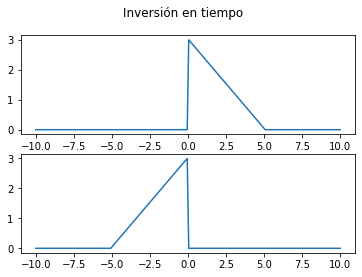

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t1, t2 = (-10,10)
points = (t2 - t1) * 10
t = np.linspace(t1, t2, points)
t1, t2 = (0,5) #Soporte inicial del triángulo.
s = np.linspace(t1, t2, points, endpoint=False)

amplitud = 3
fx = lambda t, s: triangulo(t, s, amplitud) 
x = fx(t, s) #Triángulo de ampitud 3

def inversion_tiempo(signal):
  return np.flip(signal, axis=0)

x_invertida = inversion_tiempo(x)

fig, axs = plt.subplots(2)
fig.suptitle('Inversión en tiempo')
axs[0].plot(t, x)
axs[1].plot(t, x_invertida)


**2.1.1 Componente par e impar de una señal**

Cualquier señal se compone de una parte par (señal par) y una parte impar (señal impar). 
Por este motivo, cualquier señal puede descomponerse en su parte par y su parte impar, así: 

x(t) = Par{x(t)} + Impar{x(t)}


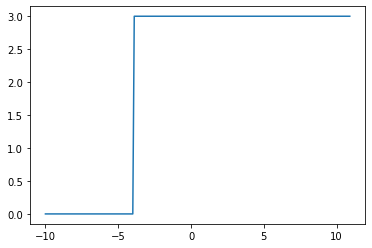

In [ ]:
# Señal de prueba
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(-10, 11, 0.1)
x = np.array([])
value = 10

for i in t:
  if i >= -4:
    x = np.append(x, 3)
  else:
    x = np.append(x, 0)

plt.plot(t, x)

*   La parte par de la señal puede encontrase así:

Par{x(t)} = [x(t)+x(-t)]/2

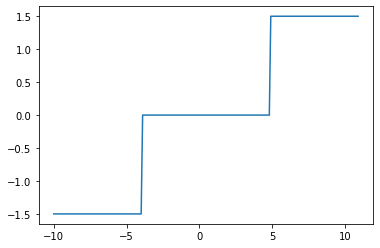

In [ ]:
# Inversion en el tiempo
def inversion_tiempo(signal):
  return np.flip(signal, axis=0)

x_invertida = inversion_tiempo(x)

# Componente impar
def componente_impar(signal):
  impar = signal - inversion_tiempo(signal)
  impar = impar / 2
  return impar

plt.plot(t, componente_impar(x)) 

*   La parte impar de la señal puede encontrase así:

Impar{x(t)} = [x(t)-x(-t)]/2

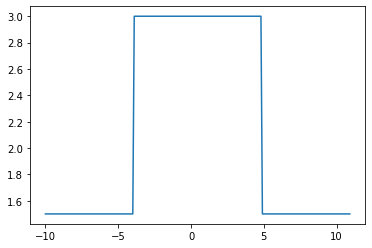

In [ ]:
# Componente par
def componente_par(signal):
  par = signal + inversion_tiempo(signal)
  par = par / 2
  return par

plt.plot(t, componente_par(x)) 

**2.2 Desplazamiento en tiempo**

Al desplazar en el tiempo una señal, se tiene lo siguiente: 
Sea x(t) la señal original, al desplazar la señal en el tiempo t0 se obtiene la señal x(t-t0), es decir la señal desplazada en eje horizontal.
*   Si t0 > 0, es entonces x(t-t0) es una versión retardada de x(t).
*   Si t0 > 0, es entonces x(t+t0) es una versión adelantada de x(t).

*Observación: Para este ejemplo se toma una ventana cuadrada con soporte entre -2 y 4, su factor de desplazamiento es -2. Usted puede variar el factor de desplazamiento y el soporte inicial de la ventana.*



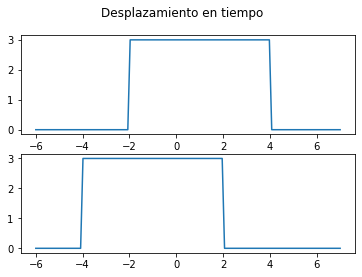

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import square, unit_impulse

def ventana(t, s, amplitud):
  x_temp = square(s, 1)

  x = np.array([])
  index = 0
  for value in t:
    value = round(value,1)
    if value in np.around(s, 1):
      x = np.append(x, x_temp[index])
      index += 1
    else:
      x = np.append(x, 0.0)

  x = x * amplitud

  return x

t1, t2 = (-6,7)
points = (t2 - t1) * 10
t = np.linspace(t1, t2, points)
t1, t2 = (-2,4) #Soporte inicial de la ventana.
s = np.linspace(t1, t2, points, endpoint=False)

amplitud = 3
fx = lambda t, s: ventana(t, s, amplitud)
factor_desplazamiento = -2 #Factor de desplazamiento
x = fx(t, s) #Ventana de amplitud 3.
x_desplazado = fx(t - factor_desplazamiento, s)

fig, axs = plt.subplots(2)
fig.suptitle('Desplazamiento en tiempo')
axs[0].plot(t, x)
axs[1].plot(t, x_desplazado)

**2.3 Escalamiento en tiempo**

Al hacer el escalamiento en el tiempo una señal, se tiene lo siguiente: 
Sea x(t) la señal original, al escalar la señal en el tiempo un valor de a se obtiene la señal x(at), es decir la señal se reproducirá a una velocidad diferente.


*   Si |a| > 1, entonces x(at) es una versión que se reproducirá más rápidamente que x(t).
*   Si |a| < 1, entonces x(at) es una versión que se reproducirá más lentamente que x(t).

*Observación: Para este ejemplo se toma una ventana cuadrada con soporpte entre -5 y 5, su factor de escalamiento es 2. Usted puede variar el factor de desplazamiento y el soporte inicial de la ventana.*



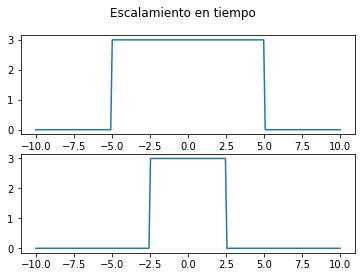

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import square, unit_impulse

t1, t2 = (-10,10)
points = (t2 - t1) * 10
t = np.linspace(t1, t2, points)
t1, t2 = (-5,5) #Soporte inicial
s = np.linspace(t1, t2, points, endpoint=False)
amplitud = 3
fx = lambda t, s: ventana(t, s, amplitud) 

factor_escalamiento = 2 #Factor de escalamiento
x = fx(t, s) #Ventana con amplitud 3.
x_escalada = fx(t * factor_escalamiento, s)

fig, axs = plt.subplots(2)
fig.suptitle('Escalamiento en tiempo')
axs[0].plot(t, x)
axs[1].plot(t, x_escalada)